<a href="https://colab.research.google.com/github/PyChef1/METODOS-NUMERICOS/blob/main/IteraciondePuntoFijo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Metodo  del punto fijo
Un punto fijo es un valor en el cual al aplicar la funcion $f$ no cambia. Es decir:

Si $f\subseteq C^0[a,b]\to\mathbb{R}$ entonces $p\in\text{dom}(f)$ es un  punto fijo si: $$f(p)=p$$ **Ejemplo 1:** Si $g(x)=x^2$

$$\begin{array}{cc}
p=0 & g(0)=(0)^2=0\\ p=1 & g(1)=(1)^2=1
\end{array}$$ Graficamente si tenemos la grafica de la identidad, se interseca con g en 0 y en 1:

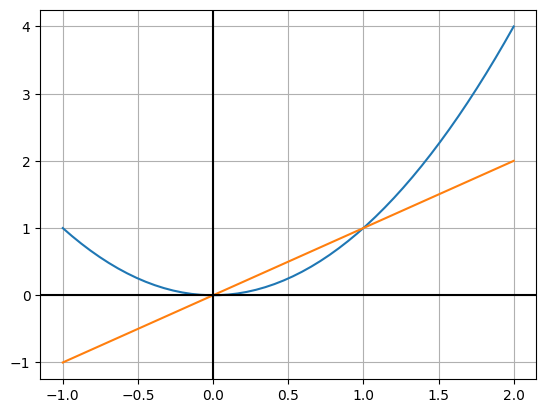

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-1,2,50)
y = [i**2 for i in x]
y_1=np.linspace(-1,2,50)

plt.plot(x,y)
plt.plot(x,y_1)
plt.axvline(color="black")
plt.axhline(color="black")
plt.grid(True)
plt.show()

**Ejemplo 2:** $g(x)=x^3$ $$\text{Puntos fijos: }\begin{array}{l}
p=-1 \\ p=0 \\ p=1
\end{array}$$ Queremos usar la relacion: $$f(x)=x-g(x)$$ Pues si $p$ es punto fijo de $g(x)$ $$\underbrace{f(p)}_{\text{raiz}}= \underbrace{p-g(p)}_{\text{punto fijo para }g}$$ **Ejemplo 3:** Determine los puntos fijos $g(x)=x^2-2$

Si $p$ es punto fijo entonces: $$p^2-2=p\implies p^2-p+2=0$$ $$\iff (p-2)(p+1)=0\ \therefore\boxed{ p=2,\ p=-1}$$

##Teorema:

*   Si $g\in C^0[a,b]$ y $g(x)\in[a,b]$ para toda $x\in[a,b]$, entonces $g$ tiene por lo menos un punto fijo en $[a,b]$
*   Si, ademas, $g'(x)$ existe en $(a,b)$ y hay una constante positiva $k<1$ con  $$|g'(x)|\leq k,\quad\text{para toda }x\in(a,b)$$ entonces existe exactamente un punto fijo en $[a,b]$.

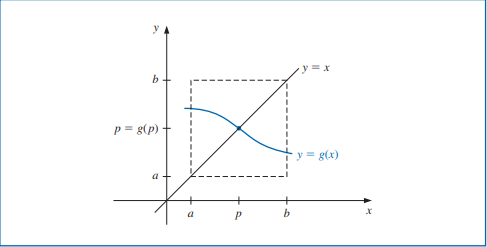

1.   Si $g(a)=a$ o $g(b)=b$, terminamos; cualquiera es punto fijo. En otro caso:

$g(a)>a$ y $g(b)<b$, pues $g(x)\in[a,b]$

Ahora la funcion $$\begin{array}{cc} h(x)=g(x)-x&\text{es continua, y se tiene}\\ h(a)=g(a)-a>0  \\ h(b)=g(b)-b<0\end{array}$$ entonces por el teorema del valor intermedio $h(x)$ tiene una raiz, $p$, en $(a,b)$ y por tanto $p$ es punto fijo de $g$.
2.  Supongamos que $|g'(x)|\leq k<1$ y que $p,q\in[a,b]$ son puntos fijos para $g$ si $p\neq q$ entonces el teorema del valor medio implica que existe un numero $\xi$ entre $p$ y $q$ y por tanto en $[a,b]$ con $$\frac{g(p)-g(q)}{p-q}=g'(\xi)$$ Por lo tanto $$|p-q|=\underbrace{|g(p)-g(q)|}_{\text{por ser puntos fijos}}=|g'(\xi)||p-q|\leq k|p-q|<|p-q|$$ Lo cual es una contradiccion, por lo que $p=q$.



**Ejemplo:** Resolver $x^3+4x^2-10=0$ en $[1,2]$

Podemos usar:
1.  $\quad0=x^3+4x^2-1$, restando la ecuacion a la identidad $x=x$ $$x=x-x^3-4x^2+10$$
2.  $\quad x^3+4x^2-10=0$ $$\implies x^2(x+4)-10=0\implies x=\left(\frac{10}{x+4}\right)^\frac{1}{2}$$

3.  $\quad x^3+4x^2-10=0$ $$\implies x^3=10-4x^2\implies x=\left(\frac{10}{x}-4x\right)^\frac{1}{2}$$

Verificamos que $g(x)$ tiene un punto fijo en $[1,2]$
Para $g(x)=\frac{1}{2}(10-x^3)^\frac{1}{2}$
Si $x\in [1,2]$, $$g(1) = 1.5\quad g(2)=0.7071$$ No cumple el teorema, pero si tiene punto fijo.

Para $g(x)=\left(\frac{10}{4+x}\right)^\frac{1}{2}$ $$\begin{array}{l}
g(1)=\sqrt{2}=1.41 \\ g(2)=1.2909 \\ g'(x)=-\frac{5^{\frac{1}{2}}}{2^{\frac{1}{2}}\left(x+4\right)^{\frac{3}{2}}}\end{array}$$ Debemos verificar que el maximo y minimo absolutos de $g(x)\in[1,2]$

In [1]:
import numpy as np
import sympy as sp
from tabulate import tabulate

def punto_fijo(p_0, tol, n_0, f):
  # Inciamos la tabla y anadimos las columnas
    tabla = []
    tabla.append([0, p_0, f(p_0), "-"])
    i = 1
    while i <= n_0:
      # Iniciamos el metodo y manejaremos dos casos, cuando la funcion no diverge.
        try:
          p = f(p_0)
          error = abs(p-p_0)
          tabla.append([i, p, f(p), error])
          if abs(p - p_0) < tol:
            print(tabulate(tabla, headers=["Iteración", "p_i", "g(p_i)", "Error"], tablefmt="grid"))
            return p
          i += 1
          p_0 = p
       # Si la funcion diverge regresa el ultimo valor calculado.
        except OverflowError:
          print("Error de sobreflujo")
          print(f"El ultimo valor calculado fue: {p_0}")
          print(tabulate(tabla, headers=["Iteración", "p_i", "g(p_i)", "Error"], tablefmt="grid"))
          return None
    print(tabulate(tabla, headers=["Iteración", "p_i", "g(p_i)", "Error"], tablefmt="grid"))
    return f"El metodo fallo despues de {n_0} iteraciones, n_0={n_0}"

# Obtener punto medio
def obtener_inicial():
    while True:
        a = float(input("Ingrese valor inferior: "))
        b = float(input("Ingrese valor superior: "))
        if b > a:
            return (a + b) / 2
        else:
            print("Error: 'b' debe ser mayor que 'a'.")


def obtener_funcion(str_expresion, variable):
  x = sp.symbols(variable) # Define el simbolo
  expresion = sp.sympify(str_expresion) #Pasa de cadena a expresion de sympy
  g=sp.lambdify(x,expresion, modules='numpy')
  return g

# Funcion principal
if __name__=="__main__":
  entrada_funcion = input("Ingrese g(x) (con 'x' como variable): ")
  g = obtener_funcion(entrada_funcion, variable='x')
  p_0 = obtener_inicial()
  tol = 1e-5
  n_0 = 100
  resultado = punto_fijo(p_0, tol, n_0, g)
  print(resultado)

Ingrese g(x) (con 'x' como variable): (10/(4+x))**(1/2)
Ingrese valor inferior: 1
Ingrese valor superior: 2
+-------------+---------+----------+------------------------+
|   Iteración |     p_i |   g(p_i) | Error                  |
+=============+=========+==========+========================+
|           0 | 1.5     |  1.3484  | -                      |
+-------------+---------+----------+------------------------+
|           1 | 1.3484  |  1.36738 | 0.1516002750735157     |
+-------------+---------+----------+------------------------+
|           2 | 1.36738 |  1.36496 | 0.018976647064798735   |
+-------------+---------+----------+------------------------+
|           3 | 1.36496 |  1.36526 | 0.0024193565887959956  |
+-------------+---------+----------+------------------------+
|           4 | 1.36526 |  1.36523 | 0.00030773271095529964 |
+-------------+---------+----------+------------------------+
|           5 | 1.36523 |  1.36523 | 3.915395291720358e-05  |
+-------------+---------